In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import matplotlib.ticker as ticker


### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [4]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


0.752147239264
Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. 
**Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.** 
 
 Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [6]:
# Creating new features
df.shape

(8147, 13)

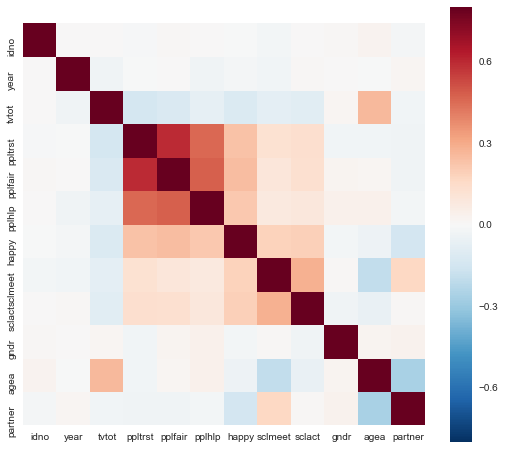

In [7]:

corrmat = df.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [25]:
print("\n -----------------Data head ---------------\n")
df.head(5)
print("\n -----------------Data tail ---------------\n")
df.tail(5)
print("\n -----------------Data types and counts---------------\n")
df.info()
print("\n -----------------Simple statistics for each variable -----------\n")
df.describe().T
print("\n ----------------Count  All missing!!-------------------\n")
df.isnull().sum()
print("\n --------------------All categorical features with number of unique values\n")
categorical = df.select_dtypes(include=['object'])
if categorical.empty: 
     print("---- No categorical features by data type ---")
else :        
    for i in categorical:
        column = categorical[i]
        print(i)
        print(column.nunique())


 -----------------Data head ---------------


 -----------------Data tail ---------------


 -----------------Data types and counts---------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.2+ MB

 -----------------Simple statistics for each variable -----------


 ----------------Count  All missing!!-------------------


 --------------------All categorical features with number of unique values

cntry
6


In [8]:
df.head(5)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [9]:
print(df.describe().T)

          count          mean            std   min     25%     50%     75%  \
idno     8147.0  40226.218854  632072.109868   1.0  1063.0  1749.0  2778.0   
year     8147.0      6.500307       0.500031   6.0     6.0     7.0     7.0   
tvtot    8147.0      3.818584       2.008937   0.0     2.0     4.0     5.0   
ppltrst  8147.0      5.574936       2.215745   0.0     4.0     6.0     7.0   
pplfair  8147.0      6.005155       2.120127   0.0     5.0     6.0     8.0   
pplhlp   8147.0      5.321468       2.166217   0.0     4.0     5.0     7.0   
happy    8147.0      7.708482       1.720839   0.0     7.0     8.0     9.0   
sclmeet  8147.0      5.215908       1.438792   1.0     4.0     6.0     6.0   
sclact   8147.0      2.755984       0.901406   1.0     2.0     3.0     3.0   
gndr     8147.0      1.496379       0.500018   1.0     1.0     1.0     2.0   
agea     8147.0     47.262182      18.316890  15.0    33.0    47.0    61.0   
partner  8147.0      1.384681       0.486550   1.0     1.0     1

In [10]:
# missing 
df.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

In [ ]:
dfs=df.loc[:, df.columns.isin(['pplfair', 'happy', 'sclmeet', 'sclact','partner'])]
sns_plot=sns.pairplot(data=dfs, hue='partner', palette='BrBG')
sns_plot.savefig("euro_ssds.png")

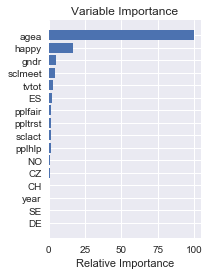

In [5]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

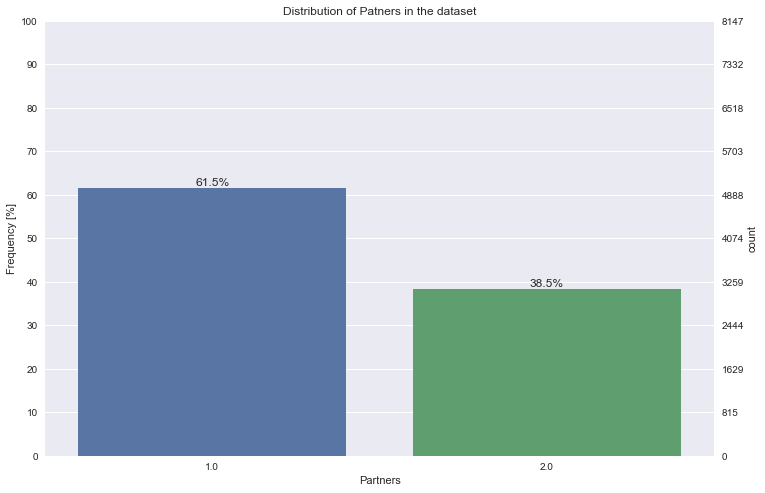

In [21]:
import matplotlib.ticker as ticker

# Some random data

plt.figure(figsize=(12,8))
ncount=len(df)
ax = sns.countplot(x="partner" , data=df)
plt.title('Distribution of Patners in the dataset')
plt.xlabel('Partners')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
plt.show()

My plan 

1. base model with default params
2. random forest to re-evaluate important
3. drop featues that are not important


3. logistic regression
> any feature eng 
> logistic regression
> GB
> overfitting 
> subsampling 
----------------------------
? different loss function? no idea 
content or pairplot: combine log? ** 2 

2. import featuretools as ft

--------------
Variables and descriptions
-----------------------

|Name|Description|
|---|---|
|agea|Age of respondent, calculated |
|tvtot|TV watching, total time on average weekday  |
|ppltrst | Most people can be trusted or you can't be too |careful |
|pplfair | Most people try to take advantage of you, or try to be fair |
|pplhlp |  Most of the time people helpful or mostly looking out for themselves   |
|happy  |  How happy are you   |
|sclmeet | How often socially meet with friends, relatives or colleagues |
|sclact  | Take part in social activities compared to others of same age |
|gndr    | gender|

## Analysis of dataset:

|N | Criteria| Value|
|--|---------|------|
|1.| Missing |No|
|2.| Correlated featues| ~ No| 
|3.| Categorical by the content| gndr, partner, countries|
|4.| Is dataset balansed? (on partnerp) | ~ Y|
|5.| Are numerical features on a similar scale|mostly yes (1-10) age 15 -100|
|6.| **Result of Random Forest Classifier**   | **score: 0.7349** |
|7.| *Most important features(8)*| *agea, pphlp, tvtot, ppltrst, happy, sclmmeet, sclat,gndr*|  
|8. | LogisticRegression solver:(newton-cg)  L1=L2=0 |score:0.7|

## Gradient boost 
-----------

|params | score | Error Type I| Error Type II |
|-------|-------|-------------|-------------|
|'n_estimators': 500, 'max_depth': 2, 'loss': 'deviance' |**score:0.75**| 0.0350 |0.1523 |
|'n_estimators': 600, 'max_depth': 2, 'loss': 'deviance' |**score:0.75**| 0.0350 |0.1523 |
|'n_estimators': 700, 'max_depth': 4, 'loss': 'deviance' |**score:0.75**| 0.0350 |0.1523 |
|'n_estimators': 500, 'max_depth': 4, 'loss': 'deviance' |**score:0.75**| 0.0350 |0.1523 |
|'n_estimators': 600, 'max_depth': 3, 'loss': 'deviance' |**score:0.75**| 0.0350 |0.1523 |



## Basic logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

#? do i need to prepare the data do i need StandardScaler
# data already prepared X_train, y_train; X_test, y_test
model_LogReg_lbfgs = LogisticRegression(max_iter=2000, random_state=10, solver='newton-cg').fit(X_train, y_train)

print(model_LogReg_lbfgs.score(X_test, y_test))



0.700613496933


## Random Forest: 

In [22]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))
f_imps = pd.DataFrame(rfc.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)    
f_imps.head(10)                                

0.722699386503


C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,importance
agea,0.353267
tvtot,0.083198
pplhlp,0.083073
ppltrst,0.081401
happy,0.077615
pplfair,0.074919
sclmeet,0.063833
sclact,0.054841
year,0.026438
gndr,0.026280


In [23]:
keep_list=f_imps.head(9).index.tolist()

In [24]:
print(keep_list)

['agea', 'tvtot', 'pplhlp', 'ppltrst', 'happy', 'pplfair', 'sclmeet', 'sclact', 'year']


In [25]:
Xt1=X.loc[:, X.columns.isin(keep_list)]
Xt1.head(5)

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,agea
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,60.0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,59.0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,24.0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,64.0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,55.0


In [28]:
from sklearn import ensemble
rfc1 = ensemble.RandomForestClassifier()
X1_train, y_train = Xt1[:offset], y[:offset]
# And put 10% in the test set.
X1_test, y_test = Xt1[offset:], y[offset:]
rfc1.fit(X1_train, y_train)
print(rfc1.score(X1_test, y_test))


0.710429447853


C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [6]:
def gb_model(X_train,y_train, X_test,y_test, params):
    
# Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    print('Score : {:.4f}'.format(clf.score(X_test,y_test)))  
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

# Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

    print((
    'Training set accuracy:\n'
    'Percent Type I errors: {:.4f}\n'
    'Percent Type II errors: {:.4f}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.4f}\n'
    'Percent Type II errors: {:.4f}'
    ).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


In [ ]:

params = {'n_estimators': 500,
          'max_depth': 2,
          'learning_rate':0.1,
          'loss': 'deviance'}
gb_model(X_train,y_train, X_test,y_test, params)

In [20]:
from sklearn.model_selection import GridSearchCV
#
parameter_candidates = [ {'n_estimators': [500,600,650,700],
          'max_depth': [2,3],
          'learning_rate':[0.1,0.12,0.14],
          'subsample':[0.8, 1],                 
          'loss': ['deviance']}
]
#
model = ensemble.GradientBoostingClassifier()
clf = GridSearchCV(estimator= model, param_grid=parameter_candidates, cv=5, n_jobs=-1)
#
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)


0.783551554828
{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 650, 'subsample': 0.8}


In [25]:
params = {'n_estimators': 650,
          'max_depth': 2,
          'learning_rate':0.1,
          'subsample':0.7,
          'loss': 'deviance'}
gb_model(X_train,y_train, X_test,y_test, params)

Score : 0.7423
Training set accuracy:
Percent Type I errors: 0.0460
Percent Type II errors: 0.1687

Test set accuracy:
Percent Type I errors: 0.0761
Percent Type II errors: 0.1816
